# **Assignment 6**

### **Brief Introduction**

In this assignment you will study the Class Imbalance problem with the help of
the Thyroid Disease Dataset.

*   You are expected to know Class Priors and how to calculate them.
*   You will be exploring various Splitting Methods on the data, observe how they affect performance with the help of various metrics and find the best parameters.
*   You will also explore Oversampling methods and compare performance across 3 models.

*   Please only fill in code where mentioned (TODO Blocks) without distrubing the rest of the code.

*   Make necessary imports in the imports section.

* All cells of the notebook should be run in order one final time before submission.





### **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  make_scorer
from sklearn.model_selection import train_test_split, ShuffleSplit, StratifiedShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

##### TO DO ######

# make more imports here if necessary #
import io
import requests

###### END #######

### **Data**

#### Thyroid Disease Dataset





*   30 columns
*   3772 rows
*'binaryClass' is your target which predicts the presence of Thyroid.
* Observe the imbalance in your target class that may lead to skewed results.



	Attribute Name			Possible Values
	--------------			---------------
	age:				continuous.
	sex:				M, F.
	on thyroxine:			f, t.
	query on thyroxine:		f, t.
	on antithyroid medication:	f, t.
	sick:				f, t.
	pregnant:			f, t.
	thyroid surgery:		f, t.
	I131 treatment:			f, t.
	query hypothyroid:		f, t.
	query hyperthyroid:		f, t.
	lithium:			f, t.
	goitre:				f, t.
	tumor:				f, t.
	hypopituitary:			f, t.
	psych:				f, t.
	TSH measured:			f, t.
	TSH:				continuous.
	T3 measured:			f, t.
	T3:				continuous.
	TT4 measured:			f, t.
	TT4:				continuous.
	T4U measured:			f, t.
	T4U:				continuous.
	FTI measured:			f, t.
	FTI:				continuous.
	TBG measured:			f, t.
	TBG:				continuous.
	referral source:		WEST, STMW, SVHC, SVI, SVHD, other.
	binaryClass:			P, N.


Some additional information on the dataset that might help:

* age - age of the patient
* sex - sex patient identifies
* on_thyroxine - whether patient is on thyroxine
* query on thyroxine - *whether patient is on thyroxine
* on antithyroid meds - whether patient is on antithyroid meds
* sick - whether patient is sick
* pregnant - whether patient is pregnant
* thyroid_surgery - whether patient has undergone thyroid surgery
* I131_treatment - whether patient is undergoing I131 treatment
* query_hypothyroid - whether patient believes they have hypothyroid
* query_hyperthyroid - whether patient believes they have hyperthyroid
* lithium - whether patient * lithium
* goitre - whether patient has goitre
* tumor - whether patient has tumor
* hypopituitary - whether patient * hyperpituitary gland
* psych - whether patient * psych
* TSH_measured - whether TSH was measured in the blood
* TSH - TSH level in blood from lab work
* T3_measured - whether T3 was measured in the blood
* T3 - T3 level in blood from lab work
* TT4_measured - whether TT4 was measured in the blood
* TT4 - TT4 level in blood from lab work
* T4U_measured - whether T4U was measured in the blood (bool)
* T4U - T4U level in blood from lab work (float)
* FTI_measured - whether FTI was measured in the blood (bool)
* FTI - FTI level in blood from lab work (float)
* TBG_measured - whether TBG was measured in the blood (bool)
* TBG - TBG level in blood from lab work
* referral_source
* binaryClass - hyperthyroidism medical diagnosis
  




#### Read Dataset

In [2]:
# Defining the path as per the data location
data_link = "https://drive.google.com/uc?id=1T-IT2XATLIUrnSQtpEXJwLn5jwnFP6G2"

# Fetch the content of the CSV file
response = requests.get(data_link).content
df = pd.read_csv(io.StringIO(response.decode('utf-8')))

In [3]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


#### Data Cleaning and Preprocessing

We drop columns that are redundant. For eg. TT4 measured just keeps a track of whether TT4 was measured with a 1 or 0 flag. Given a TT4 value, we know it was measured, so we drop it

In [4]:
df.drop(['T3 measured','TSH measured','TT4 measured','T4U measured','FTI measured','TBG measured','TBG','referral source','on thyroxine','query on thyroxine','on antithyroid medication','query hypothyroid', 'query hyperthyroid','hypopituitary', 'psych'],axis=1,inplace=True)

Rename the labels to Target column

In [5]:
df.rename(columns={'binaryClass':'Target'}, inplace=True)

In [6]:
df.replace('?',np.nan,inplace=True)

* Check Null Values and handle them by filling the numerical columns with mean.
* Drop remaining Null values
* Convert P, N to 1,0
* Convert categorical columns using one-hot encoding / dummy variables

In [7]:
df.isnull().sum()

age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Target               0
dtype: int64

In [8]:
cols = ['age','FTI','TSH','T3','TT4','T4U']
for i in cols:
    df[i] = pd.to_numeric(df[i])

In [9]:
miss_cols = ['FTI','TSH','T3','TT4','T4U']
for i in miss_cols:
    df[i] = df[i].fillna(df[i].mean())

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
I131 treatment     0
lithium            0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Target             0
dtype: int64

In [12]:
df = df.drop(1364)

In [13]:
df.TT4 = df.TT4.astype(int)
df.FTI = df.FTI.astype(int)
df.age = df.age.astype(int)

In [14]:
mapping = {'P': 1, 'N': 0}

# Apply mapping to the target column
df['Target'] = df['Target'].map(mapping)

In [15]:
from sklearn.preprocessing import LabelEncoder

cols = ['sex', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'lithium', 'goitre', 'tumor']

df = pd.get_dummies(df, columns=cols, prefix=cols)

In [16]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler to the data and transform it
to_scale = ['age','TSH','T3','TT4','T4U','FTI']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the selected columns and transform them
df[to_scale] = scaler.fit_transform(df[to_scale])

In [17]:
df

,age,TSH,T3,TT4,T4U,FTI,Target,sex_F,sex_M,sick_f,...,thyroid surgery_f,thyroid surgery_t,I131 treatment_f,I131 treatment_t,lithium_f,lithium_t,goitre_f,goitre_t,tumor_f,tumor_t
0,0.430108,0.002443,0.232227,0.287383,0.429952,0.272265,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
1,0.236559,0.007726,0.184834,0.233645,0.359903,0.274809,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
2,0.483871,0.001840,0.186114,0.250000,0.318841,0.300254,1,False,True,True,...,True,False,True,False,True,False,True,False,True,False
3,0.741935,0.000292,0.175355,0.404206,0.359903,0.274809,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
4,0.741935,0.001349,0.109005,0.137850,0.299517,0.173028,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.311828,0.009588,0.186114,0.247664,0.359903,0.274809,1,True,False,True,...,True,False,True,False,True,False,True,False,False,True
3768,0.720430,0.001877,0.194313,0.285047,0.400966,0.284987,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3769,0.784946,0.009613,0.165877,0.257009,0.396135,0.262087,1,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3770,0.763441,0.001311,0.184834,0.186916,0.333333,0.216285,1,False,True,True,...,True,False,True,False,True,False,True,False,True,False


### **Class Imbalance**

#### Observing the Imbalance

In [18]:
df['Target'].value_counts()

Target
1    3340
0     280
Name: count, dtype: int64

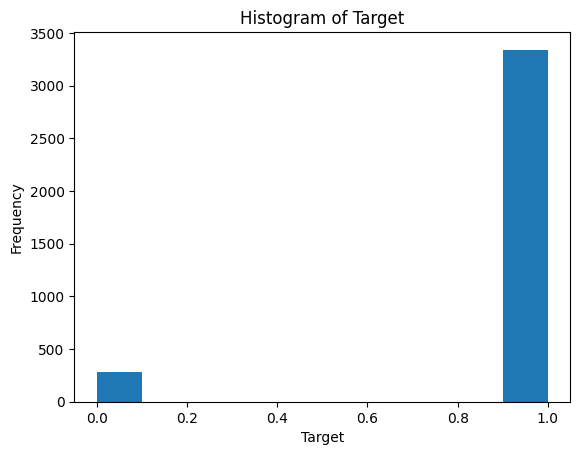

In [19]:
plt.hist(df['Target'], bins=10)

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of Target')

# Show the histogram
plt.show()

The numerical counts and the histogram both prove that there is a disparity between those that were diagnosed positively with thyroid as opposed to those who were diagnosed negatively. Creating distinct majority and minority classes.


*   Class 1 - majority
*   Class 0 - minority




#### Class Priors

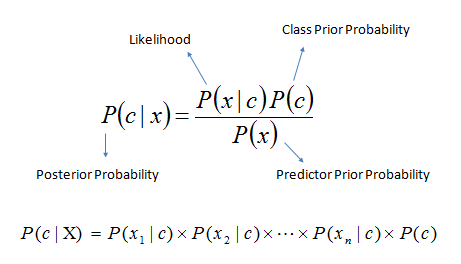


We are trying to calculate **P(c)** which is basically the relative frequency of each class within our Target Variable.

In [20]:
class_prior = df['Target'].value_counts(normalize=True)
print("Class Prior:")
print(class_prior)

Class Prior:
Target
1    0.922652
0    0.077348
Name: proportion, dtype: float64


#### Class Priors Classifier **(TODO)**

In the following cell you have to create your own Classifier which classifies on the basis of these class priors. During training, this class computes class prior probabilities. During prediction, it simply outputs the class with the class with highest prior probability.

Create two methods similar to scikitlearn as follows:


*   fit(X, y) - computes class probabilities
*   predict(X) - returns the predicted value




In [21]:
class ClassPriorClassifier:
    def __init__(self):
        self.class_priors = None
        self.classes = None

    def fit(self, X, y):
      """
      Input:
      X : features as pandas dataframe
      y : labels as pandas column

      Output:
      none: returns nothing, function is solely for computation purposes
      """

      ##### TO DO ######

      # Compute class prior probabilities during training #
      self.classes = np.unique(y)
      self.class_priors = {}
      for cls in self.classes:
          self.class_priors[cls] = np.mean(y == cls)

      ###### END #######



    def predict(self, X):
      """
      Input:
      X : features as pandas dataframe

      Output:
      predictions: returns the predicted values
      """

      ##### TO DO ######
      # Predict the class with the highest prior probability for each sample in X and save in a list '""predictions"""#
      predictions = [max(self.class_priors, key=lambda cls: self.class_priors[cls]) for _ in range(len(X))]

      ###### END #######

      return predictions

In [22]:
X = df.drop('Target',axis=1)
y= df['Target']

##### Class Priors Classifier Training

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Train classifier

classifier = ClassPriorClassifier()
classifier.fit(X_train, y_train)

# Predict using the trained classifier
predictions = classifier.predict(X_test)


##### Class Priors Classifier Evaluation

The following function 'metrics' has the necessary evaluation metrics that will be used multiple times across this notebook.

In [25]:
def metrics(predictions,y):
  accuracy = accuracy_score(y, predictions)
  print('Accuracy: ',accuracy)
  precision = precision_score(y, predictions, average='weighted', labels=np.unique(predictions))
  print('Precision: ',precision)
  recall = recall_score(y, predictions, average='weighted', labels=np.unique(predictions))
  print('Recall: ',recall)
  f1 = f1_score(y, predictions, average='weighted', labels=np.unique(predictions))
  print('F1-score: ', f1)

In [26]:
# Model Evaluation on Test Set
metrics(predictions,y_test)

Accuracy:  0.9244935543278084
Precision:  0.9244935543278084
Recall:  1.0
F1-score:  0.9607655502392344


As per the evaluation metrics above:

Accuracy: 92.45%
Precision: 92.45%
Recall: 100%
F1-score: 96.08%
These metrics indicate that the classifier performs well overall, achieving high accuracy and precision. However, it's important to note that the recall is 100%, which suggests that the classifier correctly identifies all positive samples (class 1), but it might be overly optimistic due to class imbalance. Further analysis and possibly using other evaluation metrics would be beneficial to assess the classifier's performance comprehensively.

###**Shuffle Split (TODO)**



This class shuffles the data before splitting it into train and test sets, allowing for randomness in the selection process. By randomly sampling from the entire dataset, ShuffleSplit ensures that each split contains a representative distribution of classes, which can help models learn from and generalize to imbalanced datasets more effectively.
1. ***You will use this function to split the data into 20 different train/test splits.***
2. ***Next, you will compute the min, max and average class ratios for train and test split.***

In [27]:
if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.reset_index(drop=True)

In [28]:
##### TO DO ######

# Initialize shuffle split and Split data into 20 different train_test_splits#

shuffle_split = ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)

###### END #######

In [29]:
# Check your splits
shuffle_split.get_n_splits(X)

20

In [30]:
##### TO DO ######

## Compute the min, max and average class ratios for train and test split. ##

train_ratios = []
test_ratios = []

for train_index, test_index in shuffle_split.split(X):
    train_ratio = y.iloc[train_index].value_counts(normalize=True)
    test_ratio = y.iloc[test_index].value_counts(normalize=True)
    train_ratios.append(train_ratio)
    test_ratios.append(test_ratio)

train_ratios_df = pd.DataFrame(train_ratios)
test_ratios_df = pd.DataFrame(test_ratios)

min_train_ratio = train_ratios_df.min()
max_train_ratio = train_ratios_df.max()
avg_train_ratio = train_ratios_df.mean()

min_test_ratio = test_ratios_df.min()
max_test_ratio = test_ratios_df.max()
avg_test_ratio = test_ratios_df.mean()

###### END #######

# Print the results
print("Train Split - Min Class Ratio:", min_train_ratio)
print("Train Split - Max Class Ratio:", max_train_ratio)
print("Train Split - Average Class Ratio:", avg_train_ratio)

print("Test Split - Min Class Ratio:", min_test_ratio)
print("Test Split - Max Class Ratio:", max_test_ratio)
print("Test Split - Average Class Ratio:", avg_test_ratio)

Train Split - Min Class Ratio: Target
1    0.918508
0    0.073204
dtype: float64
Train Split - Max Class Ratio: Target
1    0.926796
0    0.081492
dtype: float64
Train Split - Average Class Ratio: Target
1    0.921858
0    0.078142
dtype: float64
Test Split - Min Class Ratio: Target
1    0.906077
0    0.060773
dtype: float64
Test Split - Max Class Ratio: Target
1    0.939227
0    0.093923
dtype: float64
Test Split - Average Class Ratio: Target
1    0.925829
0    0.074171
dtype: float64


### **Stratified Shuffle Split**



In this section you will explore the effects of StratifiedShuffleSplit on various model performances
1. Ridge Classifier
1. Decision Tree Classifier
3. Support Vector Classifier

Note: please remember to give distinct model names to all as you will be reusing them further in the notebook.


***In the following cell you will generate one train/test split using StratifiedShuffleSplit.***

#### **Splitting the data**

In [31]:
##### TO DO ######

# Initialize StratifiedShuffleSplit with 1 split #
strat_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

## Split and Store train and test sets in X_train_strat, y_train_stat, X_test_strat, y_test_strat
for train_index, test_index in strat_shuffle_split.split(X, y):
    X_train_strat, X_test_strat = X.iloc[train_index], X.iloc[test_index]
    y_train_strat, y_test_strat = y.iloc[train_index], y.iloc[test_index]

###### END #######

In [32]:
# Print the shapes of the train and test sets
print("Train set shape:", X_train_strat.shape, y_train_strat.shape)
print("Test set shape:", X_test_strat.shape, y_test_strat.shape)

# Print the unique values and their counts in the target variable y for both train and test sets
print("Train set - Unique values and counts:", np.unique(y_train_strat, return_counts=True))
print("Test set - Unique values and counts:", np.unique(y_test_strat, return_counts=True))

Train set shape: (2896, 22) (2896,)
Test set shape: (724, 22) (724,)
Train set - Unique values and counts: (array([0, 1]), array([ 224, 2672]))
Test set - Unique values and counts: (array([0, 1]), array([ 56, 668]))


#### **QUESTION (TODO)**

**Question:**  *Why is StratifiedShuffleSplit better than ShuffleSplit?*


**Your Answer:**



```
##### TO DO ######

StratifiedShuffleSplit is often considered better than ShuffleSplit in scenarios where the distribution of classes or categories in the dataset
is imbalanced. StratifiedShuffleSplit is more suitable over ShuffleSplit in our case because of better performance in the below qualities

1.   Better Preservation of Class Distribution (In both Train and Test Data)
2.   Improved Model Training
3.   Robustness to Variability
4.   More Reliable Evaluation

Overall, StratifiedShuffleSplit is preferred over ShuffleSplit when working with imbalanced datasets or when it's important to maintain the
class distribution in the train/test splits (especially in Imbalanced Datasets). It helps improve model training, generalization, and
evaluation, leading to more accurate and reliable machine learning models.

**Supporting Proof for maintaing Class Distribution**

**Original Cleaned Dataset (3620)**

*   1  -  0.922652 (3340)
*   0  -  0.077348 (280)

**y_train_strat (2896)** (80% of Data for Training)

*   1  -  0.922652 (2672)
*   0  -  0.077348 (224)

**y_test_strat (724)** (20% of Data for Testing)

*   1  -  0.922652 (668)
*   0  -  0.077348 (56)

###### END #######
```



**Supporting Context:**

Both StratifiedShuffleSplit and ShuffleSplit are techniques used for generating train/test splits in machine learning. However, they differ in how they handle the distribution of classes or categories within the dataset

**StratifiedShuffleSplit:**

StratifiedShuffleSplit ensures that the class distribution is preserved in both the train and test sets. It divides the dataset into homogeneous subgroups (strata) based on the target variable (class labels) and then randomly shuffles and splits the data while maintaining the proportions of each class in each split.

*   **Preservation of Class Distribution:** The primary advantage of
StratifiedShuffleSplit is its ability to maintain a balanced representation of classes in both train and test sets, making it particularly useful for imbalanced datasets.


**ShuffleSplit:**

ShuffleSplit, on the other hand, performs simple random shuffling of the dataset without considering the class distribution. It randomly shuffles the entire dataset and then splits it into train and test sets without regard to class proportions.

*   **No Preservation of Class Distribution:** Unlike StratifiedShuffleSplit, ShuffleSplit does not guarantee a balanced representation of classes in the train/test splits. As a result, it may lead to imbalanced train/test sets, especially in cases where the dataset has unequal class proportions.


**Conclusion:**
In summary, the main difference between StratifiedShuffleSplit and ShuffleSplit lies in their treatment of class distribution. While StratifiedShuffleSplit ensures that the class distribution is preserved in the train/test splits, ShuffleSplit performs random shuffling without consideration of class proportions.

Therefore, StratifiedShuffleSplit is often preferred in scenarios where maintaining class balance is important, such as when dealing with imbalanced datasets or when the distribution of classes significantly affects model performance.

#### **Training, Testing and Evaluation (TODO)**

You have to make changes in the following function that will train the data on the given model and give evaluation metrics for comparison. This function will be used further in the notebook.

In [33]:
def TrainAndEvaluate(model, model_name, X_train, y_train, X_test, y_test):
    """
    Inputs:
    model: the classifier that you want to train
    model_name: name of the model as a string
    X_train, y_train, X_test, y_test: the training and testing data

    Returns nothing, only prints
    """

    # Set random seed for reproducibility
    np.random.seed(42)

    # Fit the model
    model.fit(X_train, y_train)
    print("Model Training Complete!")
    print("-----------------------------------")

    print(model_name, "Evaluation Metrics")
    print("-----------------------------------")

    print("Training Set: ")
    # Make predictions on the training set and evaluate using the 'metrics' function defined earlier in the notebook
    train_predictions = model.predict(X_train)
    metrics(train_predictions, y_train)

    print("-----------------------------------")

    print("Testing Set: ")
    # Make predictions on the test set and evaluate using the 'metrics' function
    test_predictions = model.predict(X_test)
    metrics(test_predictions, y_test)

##### **Ridge (TODO)**

1. Initialize the Ridge classifier with `class_weights=None`
2. Train and Evaluate the model using the TrainAndEvaluate function

**Be sure to use the StratifiedShuffleSplit Data (X_train_strat, y_train_strat, X_test_strat, y_test_strat).**



In [34]:
##### TO DO ######

# Initialize the Ridge classifier (RC)
ridge_classifier = RidgeClassifier(class_weight=None)

# Use the TrainAndEvaluate function for Training and Evaluation
TrainAndEvaluate(ridge_classifier, "Ridge Classifier", X_train_strat, y_train_strat, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Ridge Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.931975138121547
Precision:  0.936646067989116
Recall:  0.931975138121547
F1-score:  0.9064893716370815
-----------------------------------
Testing Set: 
Accuracy:  0.9281767955801105
Precision:  0.9162319824685948
Recall:  0.9281767955801105
F1-score:  0.9024885830166385


##### **Decision Tree (TODO)**

1. Initialize the Decision Tree Classifier with `class_weights=None`
2. Train and Evaluate the model using the TrainAndEvaluate function

 **Be sure to use the StratifiedShuffleSplit Data for the same.**


In [35]:
##### TO DO ######

# Initialize the Decision Tree Classifier (DTC)
decision_tree_classifier = DecisionTreeClassifier(class_weight=None)

# Use the TrainAndEvaluate function for Training and Evaluation
TrainAndEvaluate(decision_tree_classifier, "Decision Tree Classifier", X_train_strat, y_train_strat, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Decision Tree Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Accuracy:  0.9737569060773481
Precision:  0.9763400224554326
Recall:  0.9737569060773481
F1-score:  0.9746438957496856


##### **Support Vector (TODO)**

1. Initialize SVC with `class_weights=None`
2. Train and Evaluate the model using the TrainAndEvaluate function

    **Be sure to use the StratifiedShuffleSplit Data for the same.**


In [36]:
##### TO DO ######

# Initialize the Support Vector Classifier (SVC)
support_vector_classifier = SVC(class_weight=None)

# Use the TrainAndEvaluate function for Training and Evaluation
TrainAndEvaluate(support_vector_classifier, "Support Vector Classifier", X_train_strat, y_train_strat, X_test_strat, y_test_strat)

###### END #######

Model Training Complete!
-----------------------------------
Support Vector Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.9295580110497238
Precision:  0.9345545916289506
Recall:  0.9295580110497238
F1-score:  0.9014060263158875
-----------------------------------
Testing Set: 
Accuracy:  0.9267955801104972
Precision:  0.9321767649290045
Recall:  0.9267955801104972
F1-score:  0.895312257405399


#### **Hyperparameter Tuning (TODO)**

Next, you have to tune the hyperparamater `class_weight` to find the best f-score for each of these classifiers.

Make necessary changes in the CrossValidate function



In [37]:
def CrossValidate(model, param_grid):

    ##### TO DO ######

    # Set random seed for reproducibility
    np.random.seed(42)

    # Perform grid search with cross-validation and refit the best estimator
    # keep 'refit' = True, scoring = F1 since we are observing the f score
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, refit=True)
    grid_search.fit(X_train_strat, y_train_strat)

    ###### END #######

    print("Training Set: ")

    ##### TO DO ######

    # Make predictions on the training set and evaluate using the 'metrics' function
    train_predictions = grid_search.predict(X_train_strat)
    metrics(train_predictions, y_train_strat)

    ###### END #######
    print("-----------------------------------")

    print("Testing Set: ")

    ##### TO DO ######

    # Make predictions on the testing set and evaluate using the 'metrics' function
    test_predictions = grid_search.predict(X_test_strat)
    metrics(test_predictions, y_test_strat)

    ###### END #######
    print("-----------------------------------")


    ###### TODO #######

    # Store best hyperparameters and results
    best_hyperparams = grid_search.best_params_

    # Store results of grid search
    results = grid_search.cv_results_

    ###### END #######

    #Print the Best Hyperparameters
    print("Best Hyperparameters:", best_hyperparams)

    # Plotting f1-score vs Class Weight
    params = results['params']
    print(params)
    mean_f1_scores = results['mean_test_score']

    # Extract the parameter values and corresponding F1 scores
    param_values = [param['class_weight'][0] for param in params]

    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_f1_scores, marker='o', color='b', linestyle='-')

    # Add labels and title
    plt.xlabel('0 Class Weight')
    plt.ylabel('Mean F1 Score')
    plt.title('Grid Search Results:  F1 Score vs. Class Weight')

    # Show grid and display the plot
    plt.grid(True)
    plt.show()

NOTE: Here is a sample notation for the hyperparameter `class_weight`:

`{class1: weight1, class2: weight2}`

`eg: [{class1: weight1, class2: weight2}, {class1: weight3, class2: weight4}....]`

`where weight can be any positive number`

You should have a collection / various combinations / list of these dictionaries of weights for each class in your param_grid for hyperparameter tuning.
Be careful with your choice of weights keeping in mind which class deserves to have more weight.
Then cross validate using the CrossValidate() function described earlier

In [38]:
##### TO DO ######

# Initialize an empty list to store the parameter grid
param_grid = []

# Iterate over the weights range to generate parameter combinations
for weight in range(1,11):
    param_grid.append({'class_weight': [{0: weight, 1: 1}]}) #adjusting the weight of class 0 as we have an imbalanced dataset

# Print the generated parameter grid
print(param_grid)

###### END #######

[{'class_weight': [{0: 1, 1: 1}]}, {'class_weight': [{0: 2, 1: 1}]}, {'class_weight': [{0: 3, 1: 1}]}, {'class_weight': [{0: 4, 1: 1}]}, {'class_weight': [{0: 5, 1: 1}]}, {'class_weight': [{0: 6, 1: 1}]}, {'class_weight': [{0: 7, 1: 1}]}, {'class_weight': [{0: 8, 1: 1}]}, {'class_weight': [{0: 9, 1: 1}]}, {'class_weight': [{0: 10, 1: 1}]}]


##### **Ridge (TODO)**

------------------------------------------
Ridge Classifier Hyperparameter Tuning
------------------------------------------
Training Set: 
Accuracy:  0.9444060773480663
Precision:  0.9415858436181684
Recall:  0.9444060773480663
F1-score:  0.9320978369685489
-----------------------------------
Testing Set: 
Accuracy:  0.9392265193370166
Precision:  0.9355979024253208
Recall:  0.9392265193370166
F1-score:  0.9232283324053852
-----------------------------------
Best Hyperparameters: {'class_weight': {0: 4, 1: 1}}
[{'class_weight': {0: 1, 1: 1}}, {'class_weight': {0: 2, 1: 1}}, {'class_weight': {0: 3, 1: 1}}, {'class_weight': {0: 4, 1: 1}}, {'class_weight': {0: 5, 1: 1}}, {'class_weight': {0: 6, 1: 1}}, {'class_weight': {0: 7, 1: 1}}, {'class_weight': {0: 8, 1: 1}}, {'class_weight': {0: 9, 1: 1}}, {'class_weight': {0: 10, 1: 1}}]


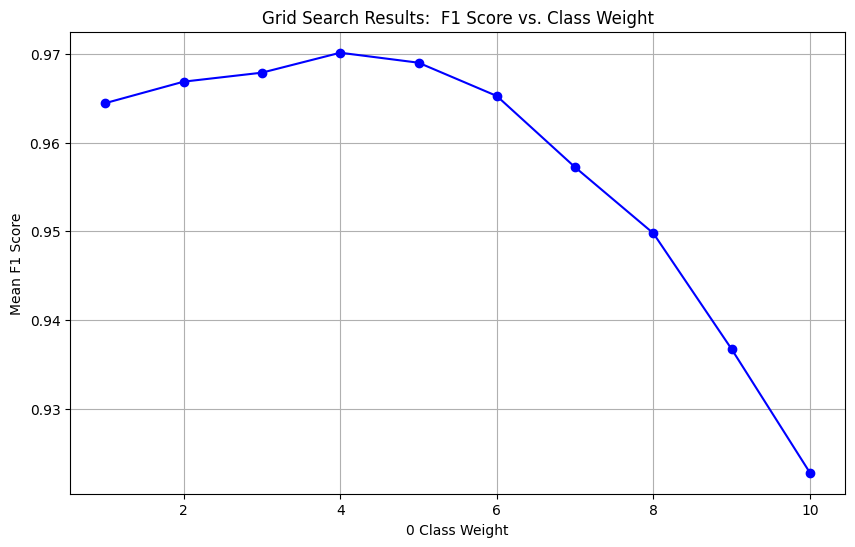

In [39]:
print("------------------------------------------")
print("Ridge Classifier Hyperparameter Tuning")
print("------------------------------------------")

##### TO DO ######

# Cross Validate using the CrossValidate() function with your Ridge Classifier which was defined earlier and the param_grid
CrossValidate(ridge_classifier, param_grid)

###### END #######

##### **Decision Tree (TODO)**

------------------------------------------------
Decision Tree Classifier Hyperparameter Tuning
------------------------------------------------
Training Set: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Accuracy:  0.9792817679558011
Precision:  0.9803618297520704
Recall:  0.9792817679558011
F1-score:  0.9796855504357443
-----------------------------------
Best Hyperparameters: {'class_weight': {0: 1, 1: 1}}
[{'class_weight': {0: 1, 1: 1}}, {'class_weight': {0: 2, 1: 1}}, {'class_weight': {0: 3, 1: 1}}, {'class_weight': {0: 4, 1: 1}}, {'class_weight': {0: 5, 1: 1}}, {'class_weight': {0: 6, 1: 1}}, {'class_weight': {0: 7, 1: 1}}, {'class_weight': {0: 8, 1: 1}}, {'class_weight': {0: 9, 1: 1}}, {'class_weight': {0: 10, 1: 1}}]


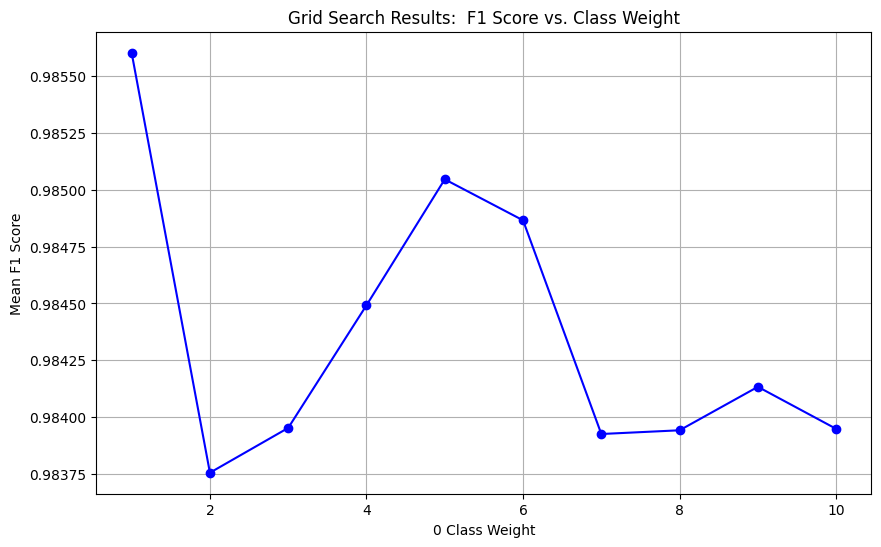

In [40]:
print("------------------------------------------------")
print("Decision Tree Classifier Hyperparameter Tuning")
print("------------------------------------------------")

##### TO DO ######

# Cross Validate your Decision Tree Classifier which was defined earlier using CrossValidate()
CrossValidate(decision_tree_classifier, param_grid)

###### END #######

##### **Support Vector (TODO)**

------------------------------------------------
Support Vector Classifier Hyperparameter Tuning
------------------------------------------------
Training Set: 
Accuracy:  0.9478591160220995
Precision:  0.9438088789071782
Recall:  0.9478591160220995
F1-score:  0.938789478185745
-----------------------------------
Testing Set: 
Accuracy:  0.9392265193370166
Precision:  0.9305761641673245
Recall:  0.9392265193370166
F1-score:  0.9277826241478466
-----------------------------------
Best Hyperparameters: {'class_weight': {0: 5, 1: 1}}
[{'class_weight': {0: 1, 1: 1}}, {'class_weight': {0: 2, 1: 1}}, {'class_weight': {0: 3, 1: 1}}, {'class_weight': {0: 4, 1: 1}}, {'class_weight': {0: 5, 1: 1}}, {'class_weight': {0: 6, 1: 1}}, {'class_weight': {0: 7, 1: 1}}, {'class_weight': {0: 8, 1: 1}}, {'class_weight': {0: 9, 1: 1}}, {'class_weight': {0: 10, 1: 1}}]


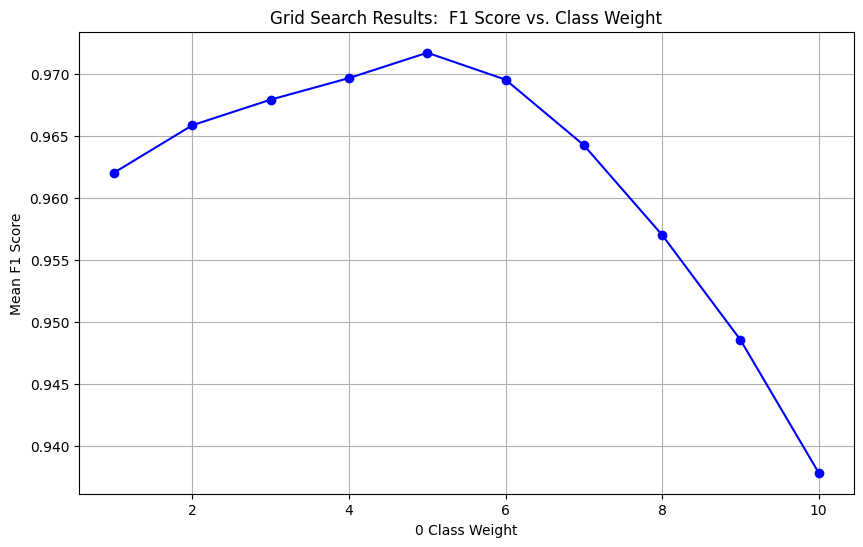

In [41]:
print("------------------------------------------------")
print("Support Vector Classifier Hyperparameter Tuning")
print("------------------------------------------------")

##### TO DO ######

# Cross Validate your Support Vector Classifier which was defined earlier using CrossValidate()
CrossValidate(support_vector_classifier, param_grid)

###### END #######

### **Oversampling**

In this section we will explore various oversampling methods and observe the subsequent effects on the performance on our classifiers

Oversampling is a technique used in machine learning to address class imbalance problems, particularly in classification tasks where one class is significantly underrepresented compared to others.

In oversampling, the minority class (the class with fewer instances) is artificially increased by generating synthetic samples or by duplicating existing samples until the class distribution is more balanced. This ensures that the model is exposed to enough examples of the minority class during training, helping it learn more effectively and make better predictions.


**Common oversampling techniques include:**


1. **Random Oversampling:** Randomly duplicating samples from the minority class until the class distribution is balanced.
2. **Synthetic Minority Over-sampling Technique (SMOTE):** Generating synthetic samples for the minority class by interpolating between existing samples in feature space.
3. **Adaptive Synthetic Sampling (ADASYN):** Similar to SMOTE, but it focuses on generating synthetic samples for difficult-to-learn minority instances.

Oversampling can be an effective way to mitigate the impact of class imbalance on model performance, but it's important to be cautious of potential overfitting, particularly when the minority class is already well represented in the dataset.

####**Random OverSampling**

Use the RandomOverSampler to resample the **Stratified training data** and test with **Stratified testing data**

##### Initialize **(TODO)**






In [42]:
##### TO DO ######

# Initialize RandomOverSampler
random_oversampler = RandomOverSampler(random_state=42)

# Fit and Assign
X_resampled, y_resampled = random_oversampler.fit_resample(X_train_strat, y_train_strat)

###### END #######

Shape of X_resampled: (5344, 22)
Shape of y_resampled: (5344,)
Class Distribution before Random OverSampling:
Target
1    2672
0     224
Name: count, dtype: int64
Class Distribution after Random OverSampling:
Target
1    2672
0    2672
Name: count, dtype: int64


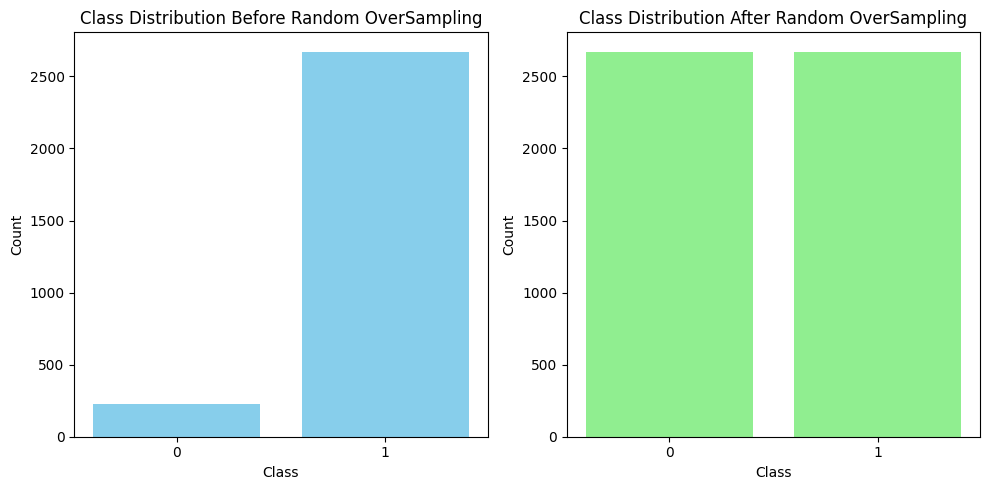

In [43]:
# Check the shape of the resampled data
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

# Optionally, print the class distribution before and after random oversampling
print("Class Distribution before Random OverSampling:")
print(y_train_strat.value_counts())

print("Class Distribution after Random OverSampling:")
print(pd.Series(y_resampled).value_counts())

# Optionally, visualize the class distribution before and after random oversampling
plt.figure(figsize=(10, 5))

# Plot class distribution before random oversampling
plt.subplot(1, 2, 1)
plt.title('Class Distribution Before Random OverSampling')
plt.hist(y_train_strat, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-ticks to 0 and 1

# Plot class distribution after random oversampling
plt.subplot(1, 2, 2)
plt.title('Class Distribution After Random OverSampling')
plt.hist(y_resampled, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-ticks to 0 and 1

plt.tight_layout()
plt.show()

**Remember to use X_resampled, y_resampled for training and X_test_strat, y_test_strat for testing**

##### Refit Ridge Classifier **(TODO)**

In [44]:
print("Refitting Ridge Classifier... ")

##### TO DO ######

# Train and Evaluate using TrainAndEvaluate() with Ridge Classifier defined earlier
TrainAndEvaluate(ridge_classifier, "Ridge Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Ridge Classifier... 
Model Training Complete!
-----------------------------------
Ridge Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.7533682634730539
Precision:  0.7580525148131579
Recall:  0.7533682634730539
F1-score:  0.7522439267085247
-----------------------------------
Testing Set: 
Accuracy:  0.819060773480663
Precision:  0.9184423289360474
Recall:  0.819060773480663
F1-score:  0.8545607807790967


##### Refit Decision Tree Classifier **(TODO)**

In [45]:
print("Refitting Decision Tree Classifier...")

##### TO DO ######

# Train and Evaluate using TrainAndEvaluate() with Decision Tree Classifier defined earlier
TrainAndEvaluate(decision_tree_classifier, "Decision Tree Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Decision Tree Classifier...
Model Training Complete!
-----------------------------------
Decision Tree Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Accuracy:  0.9779005524861878
Precision:  0.9799054076678385
Recall:  0.9779005524861878
F1-score:  0.9785706361357029


##### Refit Support Vector Classifier **(TODO)**

In [46]:
print("Refitting Support Vector Classifier...")

##### TO DO ######

# Train and evaluate using TrainAndEvaluate() with Support Vector Classifier defined earlier
TrainAndEvaluate(support_vector_classifier, "Support Vector Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Support Vector Classifier...
Model Training Complete!
-----------------------------------
Support Vector Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.7750748502994012
Precision:  0.7910499387347526
Recall:  0.7750748502994012
F1-score:  0.7719454982983308
-----------------------------------
Testing Set: 
Accuracy:  0.8867403314917127
Precision:  0.9279524545439518
Recall:  0.8867403314917127
F1-score:  0.9020168933501063


####**SMOTE**

Use SMOTE to resample the **Stratified training data** and test with **Stratified testing data**

##### Initialize **(TODO)**

In [47]:
##### TO DO ######

# Initialize SMOTE
smote = SMOTE()

# Fit and Assign
X_resampled, y_resampled = smote.fit_resample(X_train_strat, y_train_strat)

###### END #######

Shape of X_resampled: (5344, 22)
Shape of y_resampled: (5344,)
Class Distribution before SMOTE Resampling:
Target
1    2672
0     224
Name: count, dtype: int64
Class Distribution after SMOTE Resampling:
Target
1    2672
0    2672
Name: count, dtype: int64


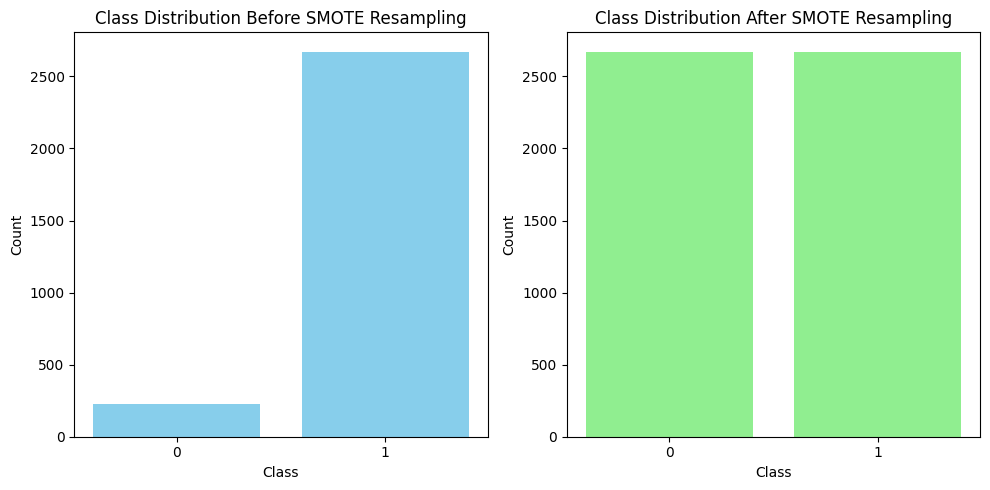

In [48]:
# Check the shape of the resampled data
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

# Optionally, print the class distribution before and after random oversampling
print("Class Distribution before SMOTE Resampling:")
print(y_train_strat.value_counts())

print("Class Distribution after SMOTE Resampling:")
print(pd.Series(y_resampled).value_counts())

# Plot class distribution before resampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Class Distribution Before SMOTE Resampling')
plt.hist(y_train_strat, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-ticks to 0 and 1

# Plot class distribution after resampling
plt.subplot(1, 2, 2)
plt.title('Class Distribution After SMOTE Resampling')
plt.hist(y_resampled, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-ticks to 0 and 1

plt.tight_layout()
plt.show()

**Remember to use X_resampled, y_resampled for training and X_test_strat, y_test_strat for testing**

##### Refit Ridge Classifier **(TODO)**

In [49]:
print("Refitting Ridge Classifier...")

##### TO DO ######

# Train and evaluate using TrainAndEvaluate() with Ridge Classifier defined earlier
TrainAndEvaluate(ridge_classifier, "Ridge Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Ridge Classifier...
Model Training Complete!
-----------------------------------
Ridge Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.7610404191616766
Precision:  0.7668123092824979
Recall:  0.7610404191616766
F1-score:  0.7597410523425897
-----------------------------------
Testing Set: 
Accuracy:  0.8287292817679558
Precision:  0.9161765818868227
Recall:  0.8287292817679558
F1-score:  0.8606981101079169


##### Refit Decision Tree Classifier **(TODO)**

In [50]:
print("Refitting Decision Tree Classifier...")

##### TO DO ######

# Train and Evaluate using TrainAndEvaluate() with Decision Tree Classifier defined earlier
TrainAndEvaluate(decision_tree_classifier, "Decision Tree Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Decision Tree Classifier...
Model Training Complete!
-----------------------------------
Decision Tree Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Accuracy:  0.9737569060773481
Precision:  0.9763400224554326
Recall:  0.9737569060773481
F1-score:  0.9746438957496856


##### Refit Support Vector Classifier **(TODO)**

In [51]:
print("Refitting Support Vector Classifier...")

##### TO DO ######

# Train and Evaluate using TrainAndEvaluate() with Support Vector Classifier defined earlier
TrainAndEvaluate(support_vector_classifier, "Support Vector Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Support Vector Classifier...
Model Training Complete!
-----------------------------------
Support Vector Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.781811377245509
Precision:  0.7922934509935864
Recall:  0.781811377245509
F1-score:  0.7798375397052536
-----------------------------------
Testing Set: 
Accuracy:  0.8798342541436464
Precision:  0.9232044282580963
Recall:  0.8798342541436464
F1-score:  0.8962485777677955


####**ADASYN**

Use ADASYN to resample the **Stratified training data** and test with **Stratified testing data**

##### Initialize **(TODO)**

In [52]:
##### TO DO ######

# Initialize ADASYN
adasyn = ADASYN()

# Fit and Assign
X_resampled, y_resampled = adasyn.fit_resample(X_train_strat, y_train_strat)

###### END #######

Shape of X_resampled: (5330, 22)
Shape of y_resampled: (5330,)
Class Distribution before ADASYN Resampling:
Target
1    2672
0     224
Name: count, dtype: int64
Class Distribution after ADASYN Resampling:
Target
1    2672
0    2658
Name: count, dtype: int64


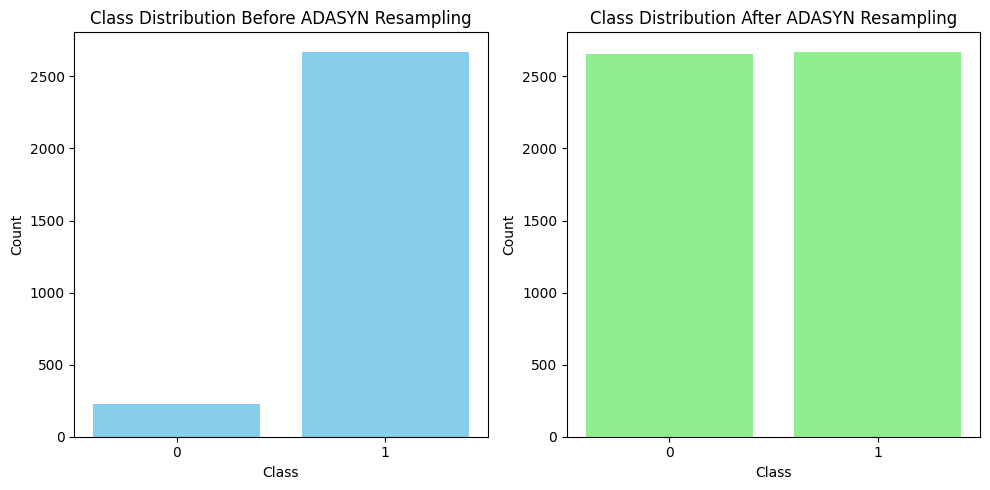

In [53]:
# Check the shape of the resampled data
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

# Optionally, print the class distribution before and after random oversampling
print("Class Distribution before ADASYN Resampling:")
print(y_train_strat.value_counts())

print("Class Distribution after ADASYN Resampling:")
print(pd.Series(y_resampled).value_counts())


# Plot class distribution before resampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Class Distribution Before ADASYN Resampling')
plt.hist(y_train_strat, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-ticks to 0 and 1

# Plot class distribution after resampling
plt.subplot(1, 2, 2)
plt.title('Class Distribution After ADASYN Resampling')
plt.hist(y_resampled, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-ticks to 0 and 1

plt.tight_layout()
plt.show()

**Remember to use X_resampled, y_resampled for training and X_test_strat, y_test_strat for testing**

##### Refit Ridge Classifier **(TODO)**

In [54]:
print("Refitting Ridge Classifier...")

##### TO DO ######

# Train and Evaluate using TrainAndEvaluate() with Ridge Classifier defined earlier
TrainAndEvaluate(ridge_classifier, "Ridge Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Ridge Classifier...
Model Training Complete!
-----------------------------------
Ridge Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.7696060037523452
Precision:  0.7700411894194975
Recall:  0.7696060037523452
F1-score:  0.769495324496441
-----------------------------------
Testing Set: 
Accuracy:  0.7941988950276243
Precision:  0.9192245428347404
Recall:  0.7941988950276243
F1-score:  0.8376232133548717


##### Refit Decision Tree Classifier **(TODO)**

In [55]:
print("Refitting Decision Tree Classifier...")

##### TO DO ######

# Train and Evaluate using TrainAndEvaluate() using Decision Tree Classifier defined earlier
TrainAndEvaluate(decision_tree_classifier, "Decision Tree Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Decision Tree Classifier...
Model Training Complete!
-----------------------------------
Decision Tree Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
-----------------------------------
Testing Set: 
Accuracy:  0.9737569060773481
Precision:  0.9770659053680861
Recall:  0.9737569060773481
F1-score:  0.9748214441594015


##### Refit Support Vector Classifier **(TODO)**

In [56]:
print("Refitting Support Vector Classifier...")

##### TO DO ######

# Train and Evaluate using TrainAndEvaluate() with Support Vector Classifier defined earlier
TrainAndEvaluate(support_vector_classifier, "Support Vector Classifier", X_resampled, y_resampled, X_test_strat, y_test_strat)

###### END #######

Refitting Support Vector Classifier...
Model Training Complete!
-----------------------------------
Support Vector Classifier Evaluation Metrics
-----------------------------------
Training Set: 
Accuracy:  0.7664165103189493
Precision:  0.7665253259560904
Recall:  0.7664165103189493
F1-score:  0.7663832291939183
-----------------------------------
Testing Set: 
Accuracy:  0.7997237569060773
Precision:  0.9253177049947601
Recall:  0.7997237569060773
F1-score:  0.8422029169904744


####**SUMMARY**
---

Here's a summary of the assignment along with important observations and conclusions:

**Dataset Overview:**

The dataset contains information about thyroid patients, with a significant class imbalance between positive (1) and negative (0) diagnoses.

**Data Preprocessing:**

Data cleaning involved dropping redundant columns, handling missing values, converting categorical variables, and scaling numerical features.
The target variable ('binaryClass') was renamed to 'Target', and '?' values were replaced with NaN.

**Class Imbalance Analysis:**

The class distribution showed a significant imbalance, with the majority class (1) comprising 92.27% of the data.
Class imbalance can lead to biased models, particularly when evaluating metrics like accuracy.

**Model Training and Evaluation:**

Three classifiers were trained and evaluated: Ridge Classifier, Decision Tree Classifier, and Support Vector Classifier (SVC).
Initial evaluations showed decent performance metrics on the test set, but class imbalance might affect the reliability of these metrics.

**Hyperparameter Tuning:**

Hyperparameter tuning was performed to optimize the class weights of the classifiers using grid search with cross-validation.
The best class weights were selected based on the F1-score metric, with different weight combinations tested.

**Oversampling Techniques:**

Oversampling techniques like Random Oversampling, SMOTE, and ADASYN were applied to address class imbalance.
Resampled data was used to refit the classifiers, aiming to improve model performance on minority class prediction.

**Model Refitting and Evaluation:**

After oversampling, the classifiers were refit and evaluated on the test set.
While some improvement in performance was observed, particularly for minority class prediction, there were variations in the effectiveness of oversampling techniques across different classifiers.

**Key Observations:**

Oversampling techniques helped improve the models' ability to predict minority class instances, as reflected in metrics like precision, recall, and F1-score. The choice of oversampling method can impact model performance, with some methods yielding better results than others depending on the dataset and classifier used.
Hyperparameter tuning, especially optimizing class weights, played a crucial role in enhancing model performance, particularly in imbalanced datasets.

**Conclusions:**

Addressing class imbalance is essential for building reliable machine learning models, especially when dealing with skewed datasets.
Oversampling techniques like SMOTE and ADASYN can effectively mitigate class imbalance, leading to better model generalization and performance.
Hyperparameter tuning, particularly optimizing class weights, can further improve model robustness and predictive accuracy, especially in imbalanced datasets.
Careful evaluation and selection of oversampling methods, hyperparameters, and evaluation metrics are crucial for developing effective models for imbalanced datasets.

In summary, this assignment highlighted the importance of addressing class imbalance in machine learning tasks and demonstrated various techniques to mitigate it. By optimizing hyperparameters and leveraging oversampling methods, it's possible to develop more accurate and reliable models, particularly for datasets with imbalanced class distributions.